# Upper Confidence Bound (UCB)

## Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [7]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [8]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

## Visualising the results

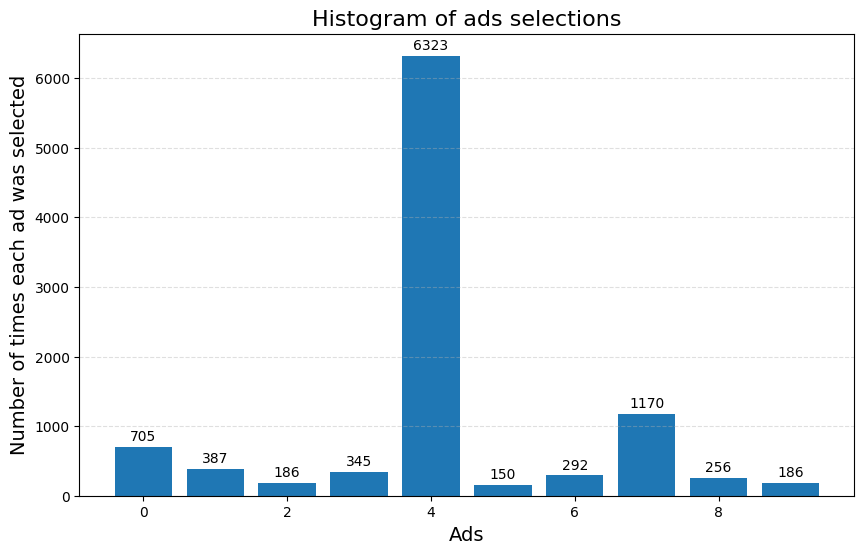

In [9]:
ads = np.arange(d)
counts = np.bincount(ads_selected, minlength=d)

plt.figure(figsize=(10, 6))
bars = plt.bar(ads, counts)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 50,
             yval,
             ha='center',
             va='bottom',
             fontsize=10)

plt.title("Histogram of ads selections", fontsize=16)
plt.xlabel("Ads", fontsize=14)
plt.ylabel("Number of times each ad was selected", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.show()


# Total Reward Progress


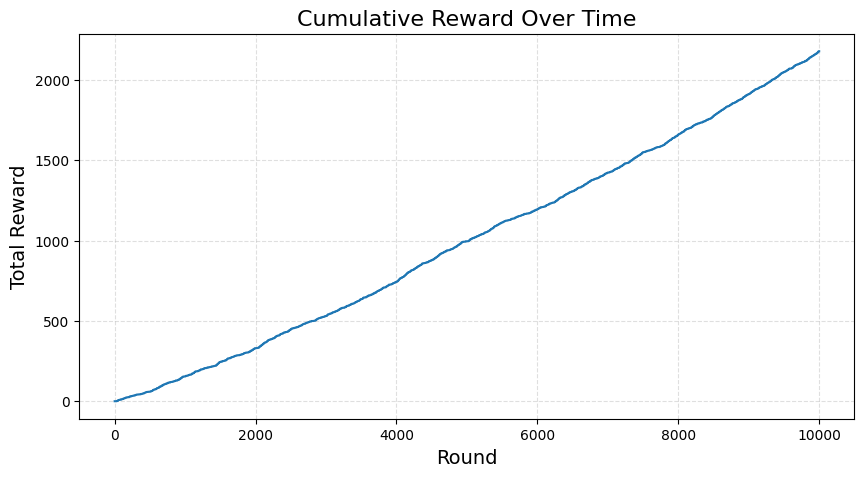

In [10]:
rewards = dataset.values[np.arange(N), ads_selected]
cumulative_reward = np.cumsum(rewards)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_reward)
plt.title("Cumulative Reward Over Time", fontsize=16)
plt.xlabel("Round", fontsize=14)
plt.ylabel("Total Reward", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.4)

plt.show()
